# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 20
BATCH_SIZE = 256
MOMENTUM = 0.90

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    sgd = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    rmsp = keras.optimizers.RMSprop(lr=lr)
    adag = keras.optimizers.Adagrad(lr=lr)
    adam = keras.optimizers.Adam(lr=lr)
    OPT  = [sgd, rmsp, adag, adam]
    
    for opt in OPT:
        print('Experiment with LR = %.6f' % (lr))
        print('Optimizer with', opt)
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        #Collect results
        train_loss = model.history.history['loss']
        valid_loss = model.history.history['val_loss']
        train_acc = model.history.history['acc']
        valid_acc = model.history.history['val_acc']
    
        exp_name_tag = 'exp-lr-%s-' % str(lr) + str(opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Experiment with LR = 0.100000
Optimizer with <keras.optimizers.SGD object at 0x64b1177d0>


Instructions for updating:
Use tf.w

Epoch 7/20
50000/50000 [==============================] - 14s 279us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 14s 279us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
50000/50000 [==============================] - 14s 280us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/20
50000/50000 [==============================] - 14s 282us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
50000/50000 [==============================] - 14s 282us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 14s 283us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 14s 283us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 255us/step - loss: 1.8638 - acc: 0.3365 - val_loss: 1.8632 - val_acc: 0.3359
Epoch 2/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.6512 - acc: 0.4147 - val_loss: 1.6445 - val_acc: 0.4115
Epoch 3/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.5608 - acc: 0.4463 - val_loss: 1.6575 - val_acc: 0.3909
Epoch 4/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.4993 - acc: 0.4687 - val_loss: 1.5569 - val_acc: 0.4351
Epoch 5/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.4459 - acc: 0.4874 - val_loss: 1.4758 - val_acc: 0.4695
Epoch 6/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.4028 - acc: 0.5011 - val_loss: 1.6214 - val_acc: 0.4301
Epoch 7/20
50000/50000 [==============================] - 11s 226us/step - loss: 1.3639 - acc: 0.5165 - val_loss: 1.

Epoch 17/20
50000/50000 [==============================] - 13s 253us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/20
50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
50000/50000 [==============================] - 13s 257us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
50000/50000 [==============================] - 13s 257us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000
Optimizer with <keras.optimizers.Adam object at 0x655a16290>
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 350us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 16s 312us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/2

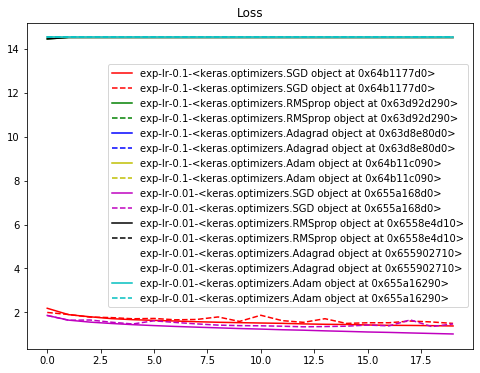

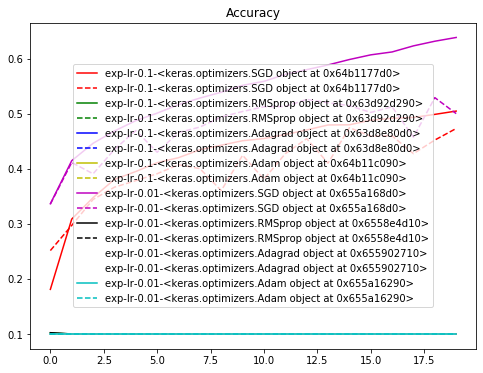

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k', 'w','c']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()